In [1]:
import matplotlib
# %matplotlib inline
import os
import numpy as np
import seaborn as sns # for plots
import pandas as pd
import matplotlib.pyplot as plt

import SUITPy as suit
import surfAnalysisPy as sa
import nibabel as nb
import nitools as nt

import Functional_Fusion.dataset as fdata
import Functional_Fusion.atlas_map as am

import selective_recruitment.plotting as splotting
import selective_recruitment.scripts.script_overlap_map_wm as soverlap
import selective_recruitment.plotting as splotting
import selective_recruitment.globals as gl

from statsmodels.stats.anova import AnovaRM # perform F test
from matplotlib.colors import LinearSegmentedColormap
from nilearn import plotting
from pathlib import Path

## overlap between encoding and retrieval
* red - > encoding contrast
* green -> retrieval contrast
* yellow -> overlap


### cerebellum

/home/ROBARTS/lshahsha/Documents/Projects/selective_recruitment/env/lib/python3.9/site-packages/SUITPy/flatmap.py:222: RuntimeWarning: Mean of empty slice
  mapped_data[:,index[v]:index[v+1]] = np.nanmean(data,axis=0)


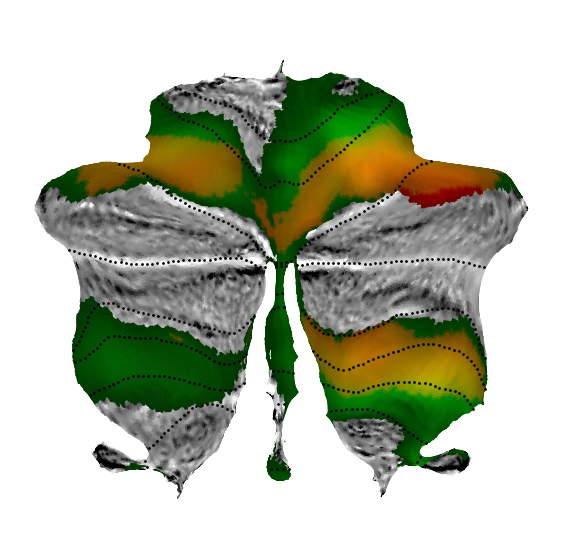

In [9]:
# get the contrast
enc_data, ret_data = soverlap.get_enc_ret_contrast(subj = "group", 
                                         smooth = 3, 
                                         recall_dir=None, 
                                         atlas_space = "SUIT3",
                                         type = "CondAll", 
                                         ses_id = "ses-02")

# prepare for rgb map
data_rgb0 =np.c_[enc_data[0].T,
                 ret_data[0].T/2,
                np.zeros(enc_data[0].T.shape),
                ].T # Leave the green gun empty 


# plot on flatmap
ax0 = soverlap.plot_rgb_map(data_rgb0, 
                            atlas_space = "SUIT3", 
                            scale = [0.2, 0.2, 1], 
                            threshold = [0.08, 0.08/2, 1])

### cortex


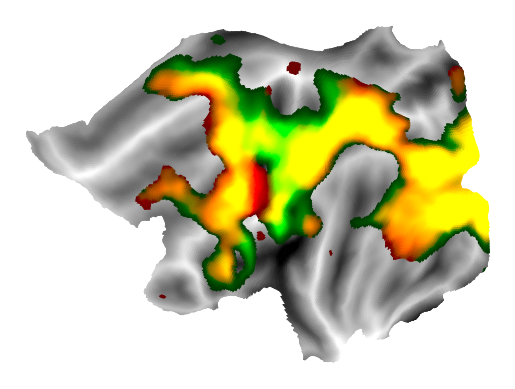

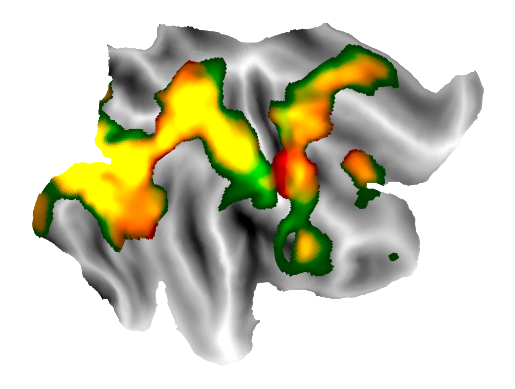

In [10]:
# get the contrast
enc_data, ret_data = soverlap.get_enc_ret_contrast(subj = "group", 
                                         smooth = 3, 
                                         recall_dir=None, 
                                         atlas_space = "fs32k",
                                         type = "CondAll", 
                                         ses_id = "ses-02")
# prepare for rgb map
data_rgb1 =np.c_[enc_data[0].T,
                 ret_data[0].T/2,
                 np.zeros(enc_data[0].T.shape),
                ].T # Leave the green gun empty 
# plot on flatmap
ax1 = soverlap.plot_rgb_map(data_rgb1, 
                            atlas_space = "fs32k", 
                            scale = [0.2, 0.2, 1], 
                            threshold = [0.08, 0.08/2, 1])

## overlap between load and recall direction effect
* recall direction - > red
* load -> blue
* overlap -> purple

## encoding in cerebellum

/home/ROBARTS/lshahsha/Documents/Projects/selective_recruitment/env/lib/python3.9/site-packages/SUITPy/flatmap.py:222: RuntimeWarning: Mean of empty slice
  mapped_data[:,index[v]:index[v+1]] = np.nanmean(data,axis=0)


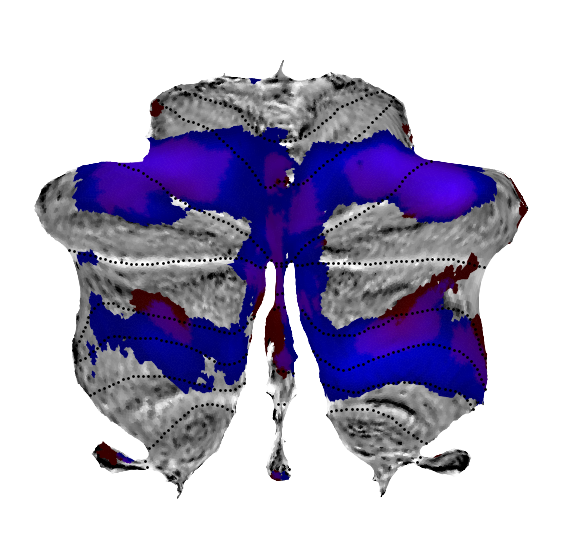

In [5]:
dir_data, load_data = soverlap.get_dir_load_contrast(subj = "group", 
                                            smooth = 3,
                                            atlas_space = "SUIT3", 
                                            type = "CondAll", 
                                            phase = 0, 
                                            ses_id = "ses-02")

# prepare for rgb map
data_rgb2 =np.c_[dir_data[0, :, :].T,
            np.zeros(dir_data[0, :, :].T.shape),
            load_data[0, :, :].T].T # Leave the green gun empty 

ax2 = soverlap.plot_rgb_map(data_rgb2, 
                            atlas_space = "SUIT3", 
                            scale = [0.01, 1, 0.01], 
                            threshold = [0.02, 1, 0.04])

### encoding in cortex

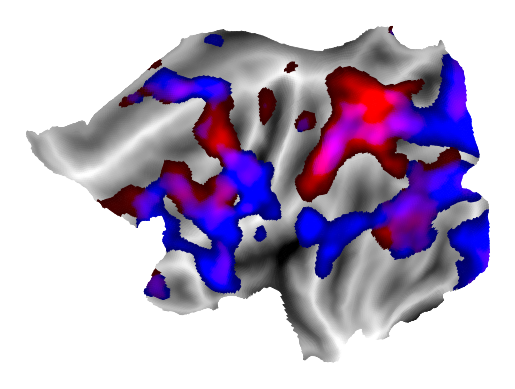

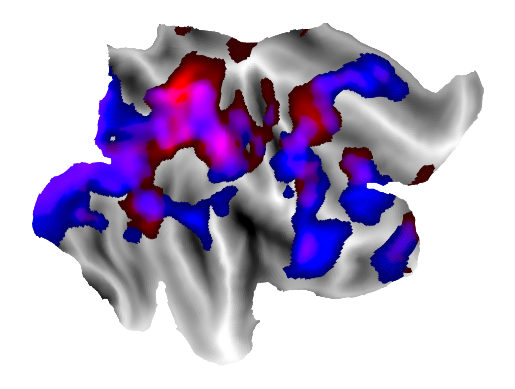

In [6]:
dir_data, load_data = soverlap.get_dir_load_contrast(subj = "group", 
                                            smooth = 3,
                                            atlas_space = "fs32k", 
                                            type = "CondAll", 
                                            phase = 0, 
                                            ses_id = "ses-02")

# prepare for rgb map
data_rgb3 =np.c_[dir_data[0, :, :].T,
            np.zeros(dir_data[0, :, :].T.shape),
            load_data[0, :, :].T].T # Leave the green gun empty 

ax3 = soverlap.plot_rgb_map(data_rgb3, 
                            atlas_space = "fs32k", 
                            scale = [0.1, 1, 0.1], 
                            threshold = [0.02, 1, 0.04])

### retrieval in cerebellum 

/home/ROBARTS/lshahsha/Documents/Projects/selective_recruitment/env/lib/python3.9/site-packages/SUITPy/flatmap.py:222: RuntimeWarning: Mean of empty slice
  mapped_data[:,index[v]:index[v+1]] = np.nanmean(data,axis=0)


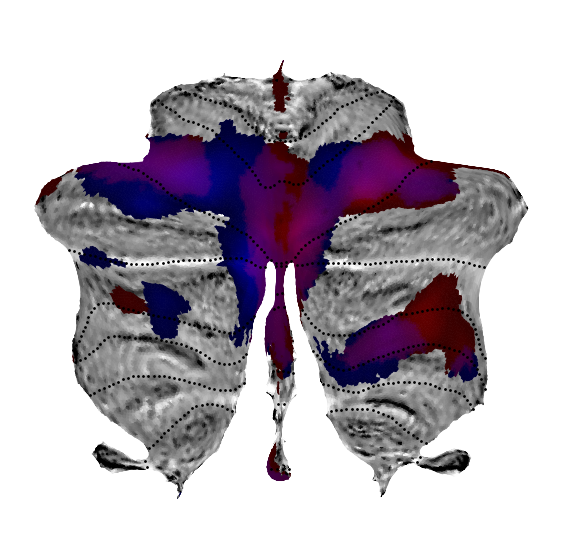

In [7]:
dir_data, load_data = soverlap.get_dir_load_contrast(subj = "group", 
                                            smooth = 3,
                                            atlas_space = "SUIT3", 
                                            type = "CondAll", 
                                            phase = 1, 
                                            ses_id = "ses-02")
# prepare for rgb map
data_rgb4 =np.c_[dir_data[0].T,
            np.zeros(dir_data[0].T.shape),
            load_data[0].T].T # Leave the green gun empty 

ax4 = soverlap.plot_rgb_map(data_rgb4, 
                            atlas_space = "SUIT3", 
                            scale = [0.1, 1, 0.1], 
                            threshold = [0.02, 1, 0.02])

### retrieval in cortex 

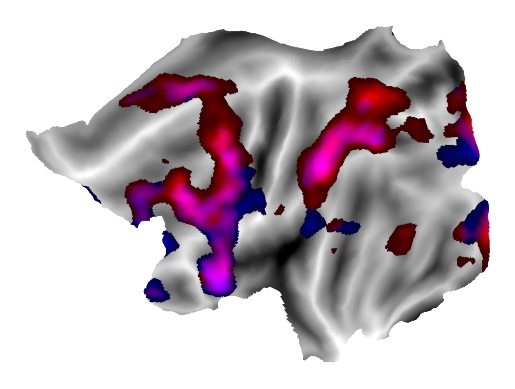

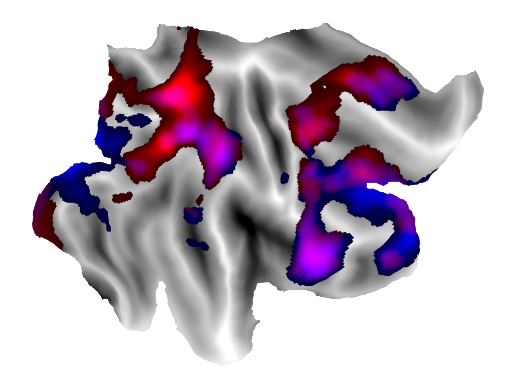

In [8]:
dir_data, load_data = soverlap.get_dir_load_contrast(subj = "group", 
                                            smooth = 3,
                                            atlas_space = "fs32k", 
                                            type = "CondAll", 
                                            phase = 1, 
                                            ses_id = "ses-02")
# prepare for rgb map
data_rgb5 =np.c_[dir_data[0].T,
            np.zeros(dir_data[0].T.shape),
            load_data[0].T].T # Leave the green gun empty 

ax5 = soverlap.plot_rgb_map(data_rgb5, 
                            atlas_space = "fs32k", 
                            scale = [0.1, 1, 0.1], 
                            threshold = [0.02, 1, 0.02])

## enc and retrieval overlap in different recall direction

### in backwards conditions cerebellum

/home/ROBARTS/lshahsha/Documents/Projects/selective_recruitment/env/lib/python3.9/site-packages/SUITPy/flatmap.py:222: RuntimeWarning: Mean of empty slice
  mapped_data[:,index[v]:index[v+1]] = np.nanmean(data,axis=0)


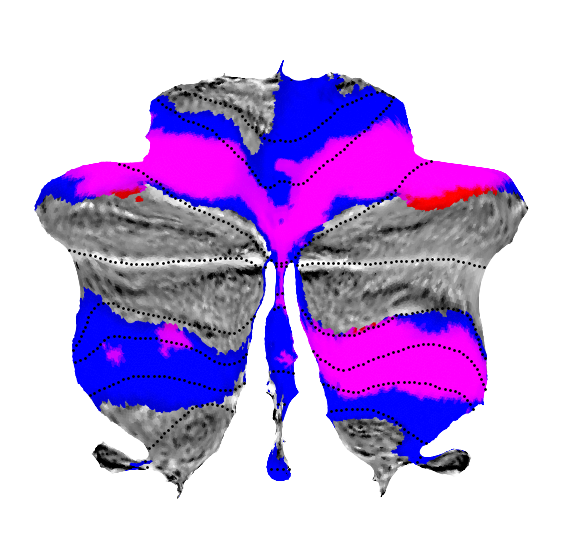

In [9]:
enc_data, ret_data = soverlap.get_enc_ret_contrast(subj = "group", 
                            smooth = 3, 
                            atlas_space = "SUIT3",
                            type = "CondAll",
                            recall_dir = 0,  
                            ses_id = "ses-02")

# prepare for rgb map
data_rgb6 =np.c_[enc_data[0].T,
            np.zeros(enc_data[0].T.shape),
            ret_data[0].T].T # Leave the green gun empty 

ax6 = soverlap.plot_rgb_map(data_rgb6, 
                            atlas_space = "SUIT3", 
                            scale = [0.1, 1, 0.1], 
                            threshold = [0.08, 1, 0.08])

### in backwards condition cortex

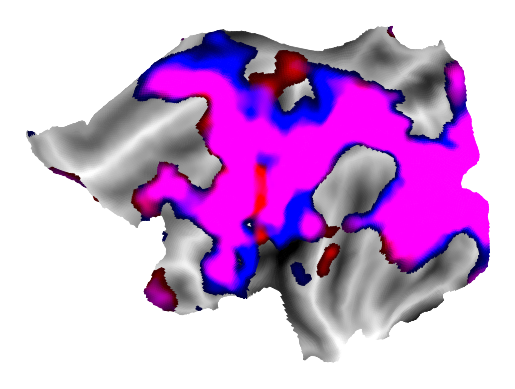

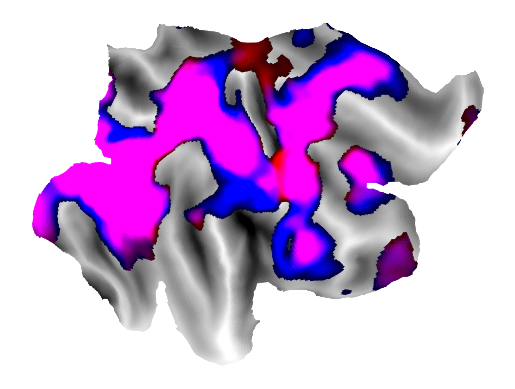

In [10]:
enc_data, ret_data = soverlap.get_enc_ret_contrast(subj = "group", 
                                            smooth = 3,
                                            atlas_space = "fs32k", 
                                            type = "CondAll", 
                                            recall_dir = 1, 
                                            ses_id = "ses-02")
# prepare for rgb map
data_rgb7 =np.c_[enc_data[0].T,
            np.zeros(enc_data[0].T.shape),
            ret_data[0].T].T # Leave the green gun empty 
ax7 = soverlap.plot_rgb_map(data_rgb7, 
                            atlas_space = "fs32k", 
                            scale = [0.1, 1, 0.1], 
                            threshold = [0.02, 1, 0.02])

### in forwards conditions cerebellum

/home/ROBARTS/lshahsha/Documents/Projects/selective_recruitment/env/lib/python3.9/site-packages/SUITPy/flatmap.py:222: RuntimeWarning: Mean of empty slice
  mapped_data[:,index[v]:index[v+1]] = np.nanmean(data,axis=0)


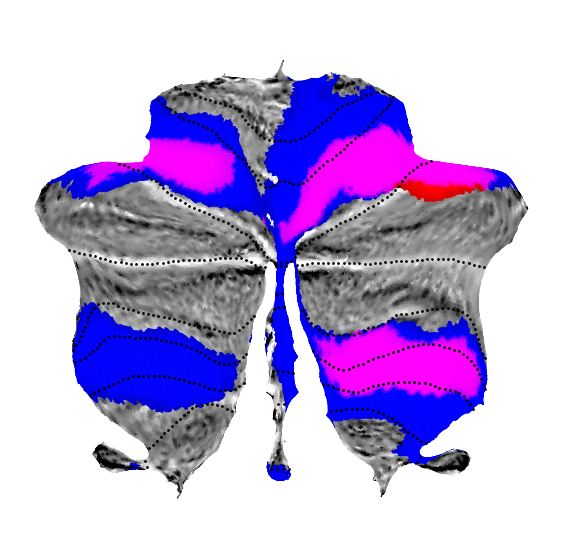

In [12]:
enc_data, ret_data = soverlap.get_enc_ret_contrast(subj = "group", 
                            smooth = 3, 
                            atlas_space = "SUIT3",
                            type = "CondAll",
                            recall_dir = 1,  
                            ses_id = "ses-02")
# prepare for rgb map
data_rgb8 =np.c_[enc_data[0].T,
            np.zeros(enc_data[0].T.shape),
            ret_data[0].T].T # Leave the green gun empty 
ax8 = soverlap.plot_rgb_map(data_rgb8, 
                            atlas_space = "SUIT3", 
                            scale = [0.1, 1, 0.1], 
                            threshold = [0.08, 1, 0.08])

### in forwardss conditions cortex

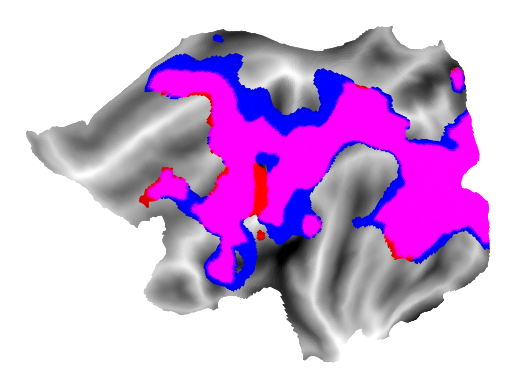

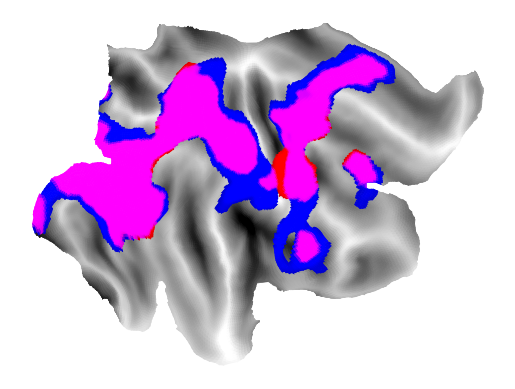

In [13]:
enc_data, ret_data = soverlap.get_enc_ret_contrast(subj = "group", 
                            smooth = 3, 
                            atlas_space = "fs32k",
                            type = "CondAll",
                            recall_dir = 1,  
                            ses_id = "ses-02")

# prepare for rgb map
data_rgb9 =np.c_[enc_data[0].T,
            np.zeros(enc_data[0].T.shape),
            ret_data[0].T].T # Leave the green gun empty 

ax9 = soverlap.plot_rgb_map(data_rgb9, 
                            atlas_space = "fs32k", 
                            scale = [0.1, 1, 0.1], 
                            threshold = [0.08, 1, 0.08])